In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)
import matplotlib.pyplot as plt # to plot
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, GlobalAveragePooling1D
from tensorflow.keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
!pip install -q -U keras-tuner --upgrade
import keras
import keras_tuner as kt

from sklearn.metrics import classification_report

In [2]:
# Load the dataset
data = pd.read_csv('archives/Sentiment_Stock_data.csv')

# Display the first few rows of the dataset
print(data.head())

   ID  Sentiment                                           Sentence
0   0          0  According to Gran , the company has no plans t...
1   1          1  For the last quarter of 2010 , Componenta 's n...
2   2          1  In the third quarter of 2010 , net sales incre...
3   3          1  Operating profit rose to EUR 13.1 mn from EUR ...
4   4          1  Operating profit totalled EUR 21.1 mn , up fro...


In [3]:
# Separate features and labels
sentences = data['Sentence'].astype(str).values  # Ensure all elements are strings
labels = data['Sentiment'].values

# Tokenize the sentences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Pad the sequences
max_length = max([len(x) for x in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert labels to numpy array
labels = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [4]:
# MLP model
# Define the MLP model
mlp_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the MLP model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the MLP model
mlp_history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.5172 - loss: 0.6897 - val_accuracy: 0.5420 - val_loss: 0.6774
Epoch 2/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.6054 - loss: 0.6349 - val_accuracy: 0.5306 - val_loss: 0.7017
Epoch 3/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.7202 - loss: 0.4981 - val_accuracy: 0.5271 - val_loss: 0.8370
Epoch 4/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7901 - loss: 0.3916 - val_accuracy: 0.5273 - val_loss: 1.1405
Epoch 5/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8393 - loss: 0.3131 - val_accuracy: 0.5257 - val_loss: 1.6052
Epoch 6/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8834 - loss: 0.2405 - val_accuracy: 0.5275 - val_loss: 2.2058
Epoch 7/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9112 - loss: 0.1872 - val_accuracy: 0.5243 - val_loss: 2.8074
Epoch 8/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.9333 - loss:

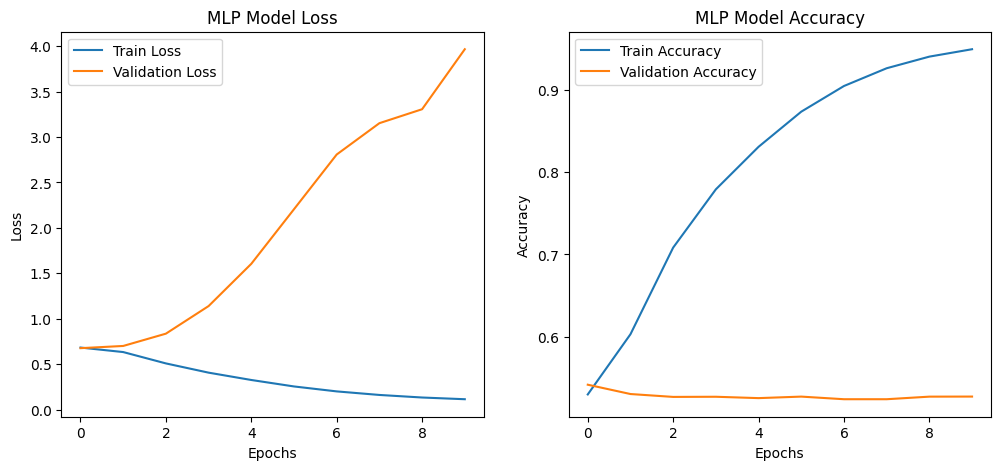

In [5]:
# Making graphs for the MLP model
# Plotting the loss and accuracy for MLP model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Train Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [6]:
# Define the CNN model
cnn_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.5281 - loss: 0.6885 - val_accuracy: 0.5459 - val_loss: 0.6761
Epoch 2/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.5726 - loss: 0.6585 - val_accuracy: 0.5405 - val_loss: 0.6831
Epoch 3/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - accuracy: 0.6559 - loss: 0.5862 - val_accuracy: 0.5265 - val_loss: 0.7488
Epoch 4/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.7609 - loss: 0.4513 - val_accuracy: 0.5311 - val_loss: 0.9377
Epoch 5/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.8411 - loss: 0.3182 - val_accuracy: 0.5271 - val_loss: 1.2762
Epoch 6/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.8969 - loss: 0.2181 - val_accuracy: 0.5272 - val_loss: 1.8151
Epoch 7/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.9249 - loss: 0.1580 - val_accuracy: 0.5283 - val_loss: 2.2695
Epoch 8/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.9404 - 

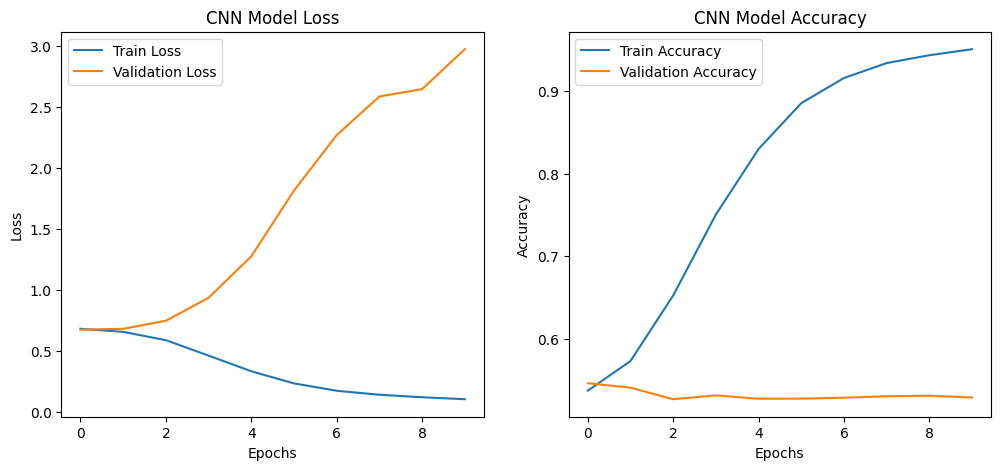

In [7]:
# Plotting the loss and accuracy for CNN model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show() 

In [8]:
# Define the LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_length),
    LSTM(32, return_sequences=True),
    Dropout(0.25),
    LSTM(16, return_sequences=True),
    Dropout(0.25),
    LSTM(8),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 105s 37ms/step - accuracy: 0.5060 - loss: 0.6935 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 2/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 90s 33ms/step - accuracy: 0.5096 - loss: 0.6931 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 3/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 112s 41ms/step - accuracy: 0.5132 - loss: 0.6929 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 4/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 112s 41ms/step - accuracy: 0.5112 - loss: 0.6929 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 5/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 114s 42ms/step - accuracy: 0.5112 - loss: 0.6930 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 6/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 122s 45ms/step - accuracy: 0.5094 - loss: 0.6927 - val_accuracy: 0.5110 - val_loss: 0.6935
Epoch 7/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 103s 38ms/step - accuracy: 0.5102 - loss: 0.6930 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 8/10
2719/2719 ━━━━━━━━━━━━━━━━━━━━ 147s 54ms/step - accuracy: 0

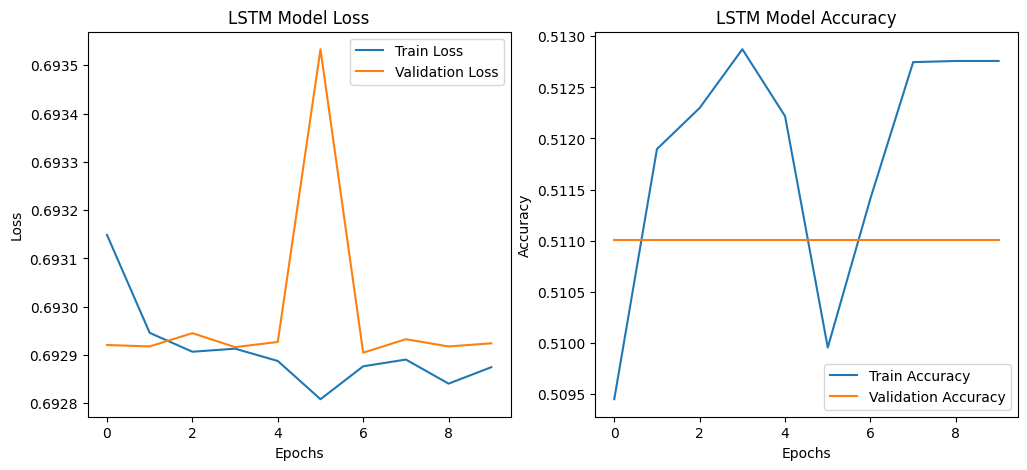

In [9]:
# Plotting the loss and accuracy for LSTM model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
class MLPHyperModel(kt.HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim=5000, output_dim=hp.Int('embedding_dim', 64, 128, step=64), input_length=max_length))
        model.add(Flatten())
        model.add(Dense(hp.Int('units', 64, 128, step=64), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

mlp_tuner = kt.RandomSearch(
    MLPHyperModel(),
    objective='val_accuracy',
    max_trials=3,  # Reduced number of trials
    executions_per_trial=1,  # Reduced executions per trial
    directory='mlp_tuner',
    project_name='sentiment_analysis'
)

mlp_tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))  # Reduced epochs

Trial 3 Complete [00h 09m 21s]
val_accuracy: 0.5454461574554443

Best val_accuracy So Far: 0.5454461574554443
Total elapsed time: 16h 03m 51s


In [11]:
class CNNHyperModel(kt.HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim=5000, output_dim=hp.Int('embedding_dim', 64, 128, step=64), input_length=max_length))
        model.add(Conv1D(filters=hp.Int('filters', 64, 128, step=64), kernel_size=5, activation='relu'))
        model.add(MaxPooling1D())
        model.add(Flatten())
        model.add(Dense(hp.Int('units', 64, 128, step=64), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

cnn_tuner = kt.RandomSearch(
    CNNHyperModel(),
    objective='val_accuracy',
    max_trials=3,  # Reduced number of trials
    executions_per_trial=1,  # Reduced executions per trial
    directory='cnn_tuner',
    project_name='sentiment_analysis'
)

cnn_tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))  # Reduced epochs

Trial 3 Complete [00h 01m 30s]
val_accuracy: 0.5405268669128418

Best val_accuracy So Far: 0.5452163219451904
Total elapsed time: 00h 04m 25s


In [12]:
class LSTMHyperModel(kt.HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Embedding(input_dim=5000, output_dim=hp.Int('embedding_dim', 64, 128, step=64), input_length=max_length))
        model.add(LSTM(hp.Int('units_lstm1', 32, 64, step=32), return_sequences=True))
        model.add(Dropout(hp.Float('dropout_rate', 0.1, 0.3, step=0.1)))
        model.add(LSTM(hp.Int('units_lstm2', 16, 32, step=16), return_sequences=True))
        model.add(Dropout(hp.Float('dropout_rate', 0.1, 0.3, step=0.1)))
        model.add(LSTM(8))
        model.add(Dropout(hp.Float('dropout_rate', 0.1, 0.3, step=0.1)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

lstm_tuner = kt.RandomSearch(
    LSTMHyperModel(),
    objective='val_accuracy',
    max_trials=3,  # Reduced number of trials
    executions_per_trial=1,  # Reduced executions per trial
    directory='lstm_tuner',
    project_name='sentiment_analysis'
)

lstm_tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))  # Reduced epochs

Trial 3 Complete [00h 09m 28s]
val_accuracy: 0.511011004447937

Best val_accuracy So Far: 0.511011004447937
Total elapsed time: 00h 26m 20s


In [13]:
# Evaluate the models
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)

print(f'MLP Model Accuracy: {mlp_accuracy}')
print(f'CNN Model Accuracy: {cnn_accuracy}')
print(f'LSTM Model Accuracy: {lstm_accuracy}')

# Generate classification reports
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype("int32")
y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype("int32")
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype("int32")

print("MLP Model Classification Report:")
print(classification_report(y_test, y_pred_mlp))

print("CNN Model Classification Report:")
print(classification_report(y_test, y_pred_cnn))

print("LSTM Model Classification Report:")
print(classification_report(y_test, y_pred_lstm))

680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5244 - loss: 4.0023
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5231 - loss: 2.9647
680/680 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5077 - loss: 0.6930
MLP Model Accuracy: 0.5275619626045227
CNN Model Accuracy: 0.5285733938217163
LSTM Model Accuracy: 0.511011004447937
680/680 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
680/680 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
680/680 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step
MLP Model Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51     10636
           1       0.54      0.55      0.54     11115

    accuracy                           0.53     21751
   macro avg       0.53      0.53      0.53     21751
weighted avg       0.53      0.53      0.53     21751

CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.51      0.51     10636
           1       0.54      0.